

# Project: Investigate a Dataset (Project_No_Show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data Description

This Dataset gives the information about 100k different patients that either missed or showed up during their appointment in Brazil. The dataset consist of 110527 rows and 14 columns which include: PatientId, Gender, ScheduledDay, AppointmentDay, AppointmentID, Handcap, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, No-show

### Questions for Analysis
Question1: How often do people with SMS_received, scholarship attend appointment as compare to others?

Question2: How does Hipertension, Diabetes affect attending an appointment.

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

In [2]:
# Load your data 
project_df = pd.read_csv('C:\\Users\\vemek\\Downloads\\noshowappointments-kagglev2-may-2016.csv')
project_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning 

In [3]:
# This gives a summary of the dataset
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# checking for duplicate data
project_df.duplicated().sum()

0

In [5]:
# features with missing values
project_df.isnull().sum().any()

False

In [6]:
# number of unique values for quality in each dataset
project_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#To convert column from float to integer
project_df['PatientId']= project_df['PatientId'].astype('int')
project_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#To replace spaces with underscore
project_df.rename({'No-show':'No_show'},axis = 1,inplace = True)

In [9]:
#To confirm the changes
project_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
110522,-2147483648,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,-2147483648,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,-2147483648,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,-2147483648,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,-2147483648,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
#To rename a column so as to get uniqueness of the name
project_df.rename(columns={'AppointmentID':'AppointmentId'},inplace=True)

In [11]:
#To confirm the changes
project_df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,-2147483648,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Convert AppointmentDay to DateTime format  
project_df['AppointmentDay'] = pd.to_datetime(project_df['AppointmentDay'])

In [13]:
# convert ScheduledDay to DataTimeformat
project_df['ScheduledDay'] = pd.to_datetime(project_df['ScheduledDay'])

In [14]:
#To confirm the changes
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentId   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [15]:
#To get a good view of the changes
project_df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How SMS_received affect attending an appointment )

In [16]:
no_show = project_df.query("No_show == 'Yes'")

This helps separate the Data of Patients that missed their appointment from those that attended.

In [17]:
no_show.head(8)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,-2147483648,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,-2147483648,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,-2147483648,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,-2147483648,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,-2147483648,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
21,-2147483648,5628338,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes
22,-2147483648,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes
31,-2147483648,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,Yes


In [18]:
def my_function(x,title):
    sns.countplot(x=x, data = no_show, hue=x).set(title=title)

In [19]:
SM_count= no_show['SMS_received'].value_counts()
SM_count

0    12535
1     9784
Name: SMS_received, dtype: int64

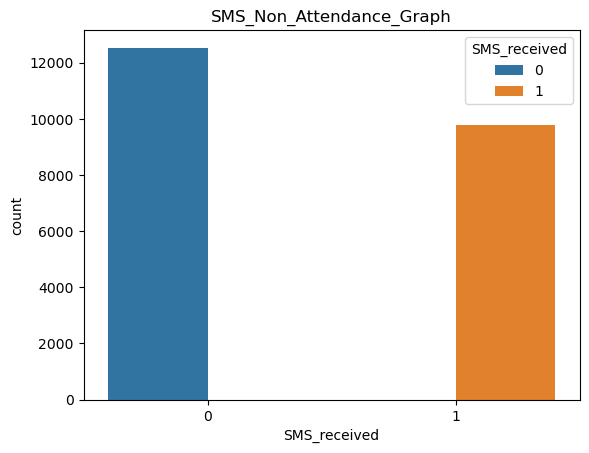

In [20]:
my_function('SMS_received' , 'SMS_Non_Attendance_Graph')

This plot compares those that received SMS and those that did not received SMS and still did not show up for their appointment.

In [21]:
SC_count= no_show['Scholarship'].value_counts()
SC_count

0    19741
1     2578
Name: Scholarship, dtype: int64

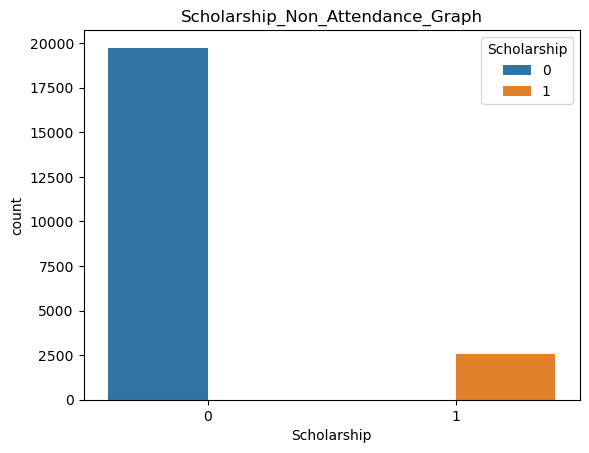

In [22]:
my_function('Scholarship' , 'Scholarship_Non_Attendance_Graph')

Plot of Scholarship and no_show.

In [23]:
project_df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

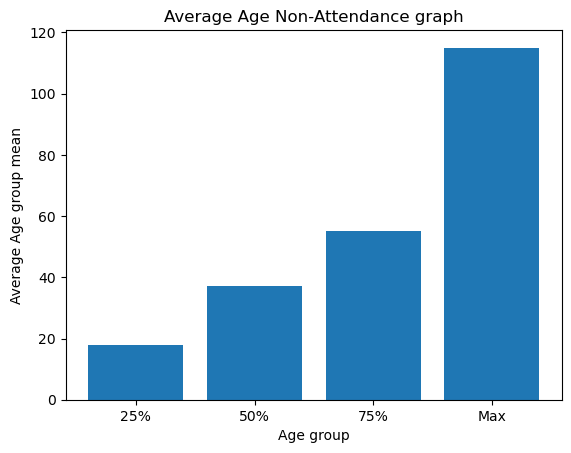

In [24]:
heights = np.array([ 18.000000, 37.000000, 55.000000, 115.000000])
plt.bar([1,2,3,4],heights, tick_label=["25%","50%","75%","Max"])
plt.title('Average Age Non-Attendance graph')
plt.xlabel('Age group')
plt.ylabel('Average Age group mean');

The graph above helps to differentiate the distinct categories of the Age

### Research Question 2: How did Hipertension, Diabetes affect keeping of appointment 

In [25]:
Hi_count= no_show['Hipertension'].value_counts()
Hi_count

0    18547
1     3772
Name: Hipertension, dtype: int64

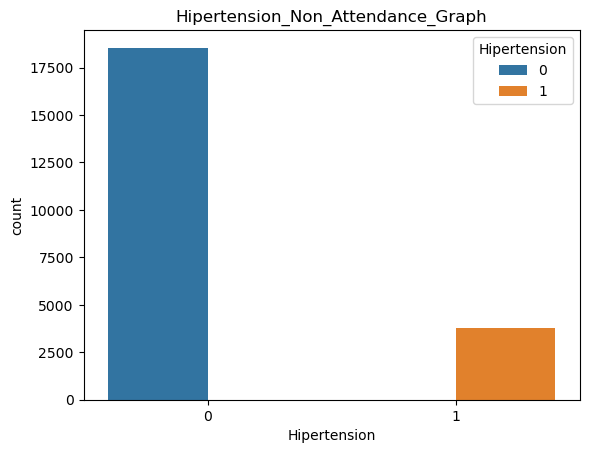

In [26]:
my_function('Hipertension' , 'Hipertension_Non_Attendance_Graph')

A graph of Hipertension and no_show

In [27]:
Di_count= no_show['Diabetes'].value_counts()
Di_count

0    20889
1     1430
Name: Diabetes, dtype: int64

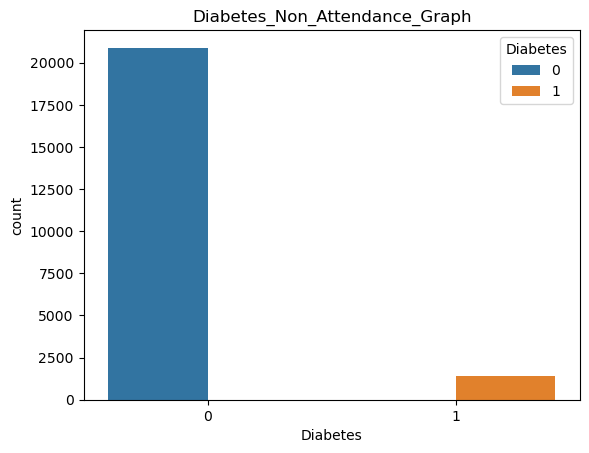

In [28]:
my_function('Diabetes' , 'Diabetes_Non_Attendance_Graph')

A Plot of Diabetes and no_show

### Multivalent Exploration of Variables

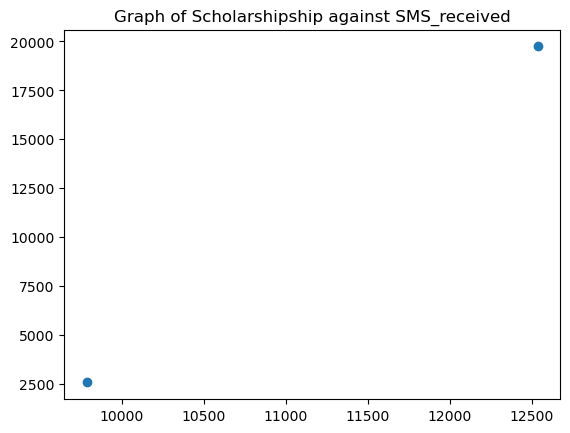

In [29]:
plt.scatter(x=SM_count,y=SC_count)
plt.title('Graph of Scholarshipship against SMS_received');

Graph of two independent variables (Scholarship and SMS_received) and the dependent variable (no_show)

<AxesSubplot:>

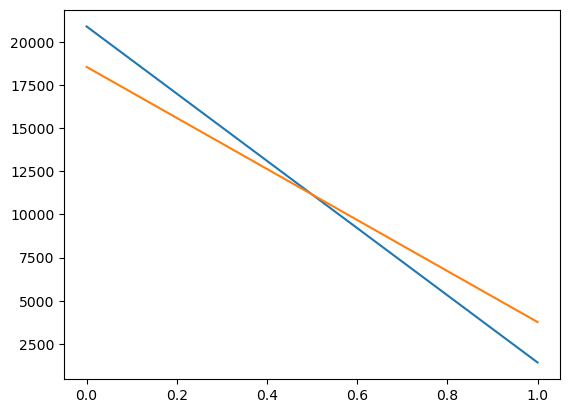

In [30]:
Di_count.plot(kind='line')
Hi_count.plot(kind='line')

Plot comparing (Hipertention and Diabetes) with no_show

<a id='conclusions'></a>
## Conclusions
From my graph, I analysed the non attendance of Patients to Scheduled appointment. I made my
analyses based on the statics of Patients that failed to meet up with their appointment with variables such as:
SMS_received, Scholarship, Hipertension and Diabetes. The plots showed uneven distribution on count of each column.
I further plotted two independent variable(SMS_received’ and ’Scholarship) against the dependent variable(no_show), 'SMS_received’ and ’Scholarship’ which showed higher level of correlations with 'no_show’ data recorded in the dataframe.

### Limitation
In the data record for SMS_received, questions such as: was the phone of the patient faulty?, was it as a result of network failure? or death of patient could result to non attendance of appointment. 